# Imagerie médicale

L'**imagerie par résonance magnétque** (IRM) est une téchnique pour obtenir des vues de l'intérieur du corps humain. L'**IRM cérébrale** est un examen permettant de détecter des anomalies dans le cerveau et d'en déterminer les causes.
   
![](https://media1.tenor.com/images/540756001c2405111acb87742f3cd18a/tenor.gif?itemid=9565732)

Un des avantages de cette modalité d'imagerie est qu'elle permet de visualiser la matière blanche, la matière grise et le liquide rachidien avec des contrastes différents.

On verra dans ce qui suit comment pouvoir segmenter ces images. Une étape très importante dans le domaine biomédical.
L'objectif est de séparer les trois classes: 
- matière grise (gm)
- matière blanche (wm)
- liquide céphalorachidien (csf)

## Importer une image

Affichez les fichiers qui se trouvent dans le dossier actuel

In [1]:
ls

Histog_IRM.png  brain.jpeg      brain2.jpg      mask.png        tumor.png
MRI_Images.zip  brain.jpg       mask.bmp        mri.ipynb


Les fichiers avec l'extension `.ipyjnb` correspondent aux fichiers iPython Notebook.
Nous voyons plusieurs fichiers en format image avec les extensions
- `.png`
- `.jpg`
- `.bmp`

La première étappe est d'importer les modules

* **numpy** (calcul numérique matriciel) et 
* **matplotlib** (affichange d'images).

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

Maintenant nous pouvons importer les images dans une matrice 

In [67]:
brain = imread('brain.jpg')[:,:,0]

La fonction `imread` (=image read) permet de lire une image a partir d'un fichier et de retourner une matrice numérique 2D. L'opérateur de tranche `[:, :, 0]` selectionne toutes les pixels mais seulement le premier canal (0).

La variable `brain` (*cerveau* en anglais) contient une matrice de l'image.
Regardons sa dimension.

In [5]:
brain.shape

(202, 165)

**Exercice**  
Créez une variable `tumor` et une variable `brain2` et importez les images correspondantes. Affichez leurs dimensions.

## Afficher une image
Affichons maintenant l'image.

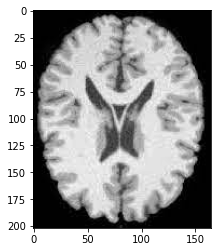

In [7]:
plt.imshow(brain, cmap='gray');

**Exercice**  
Affichez les matrices `tumor` et `brain2` comme images.

## Palette de couleurs

Une image noir et blanc possède des pixels qui ont des valeurs dans une plage [0...255] avec:

* 0 noir
* 127 gris intermédiaire
* 255 blanc

La palette de couleur permet d'associer d'autres couleurs à ces valeurs de 0 à 255.
Essaysons les palettes `jet` et `hot`.

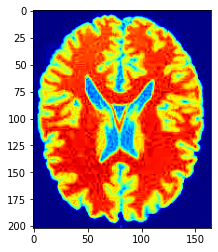

In [8]:
plt.imshow(brain, cmap='jet');

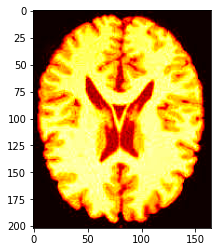

In [9]:
plt.imshow(brain, cmap='hot');

**Exercice**  
Allez sur le site [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html). 
Affichez les matrices `tumor` et `brain2` avec d'autres palettes de couleur.

## Barre de couleurs

La fonction `colorbar` ajoute une échelle de couleurs à l'image. 

La barre des couleurs associe une couleur spécifique à chaque luminosité. Par exemple pour la barre `hot` nous avons : 

- 0 - noir
- 75 - rouge
- 150 - jaune
- 200 - blanc

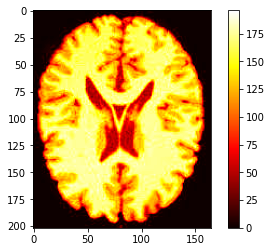

In [11]:
plt.imshow(brain, cmap='hot')
plt.colorbar();

Voici un pixel noir:

In [10]:
brain[20, 20]

1

Voici un pixel jaune:

In [12]:
brain[50, 50]

171

**Exercice**  
Cherchez un pixel avec une valeur d'environ 100 (rouge). Indexez avec l'expression `brain[y, x]`

**Attention**  
Dans une matrice, 
- le premier indice indique la ligne (y) 
- le deuxième indice la colonne (x) 

## Histogramme d'une image

L'histogramme d'une image represente la distribution des intensités: 
en abscisse on trouve les intensités et en ordonnée le nombre de fois qu'une intensité apparait dans l'image.

Dans une image IRM la distribution des trois tissus (ou classes) est comme suit:


![](Histog_IRM.png)

Observons l'histogramme de l'image `brain` avec la fonction `hist`. Par défaut la fonction `hist` compte les pixels pour 10 catégories (bins).

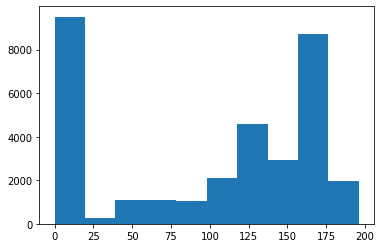

In [47]:
plt.hist(brain.ravel());

La fonction `hist` a deux options: 
- `bins` pour indiquer le nombre de catégories
- `range` pour indiquer la plage analysée

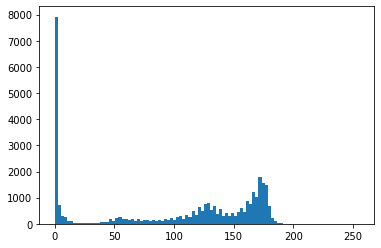

In [46]:
plt.hist(brain.ravel(), bins=100, range=(0, 255));

**Exercice**  
Refaites l'histogramme en faisant varier:
- le nombre de bins (80, 50, 25 par exemple) 
- le range ((5, 200) ou (25, 200) par exemple)

## Classification

On s'intéresse principalement à extraire les 2 tissus :
- gm (gray matter)
- wm (white matter)

Pour la classification il faut balayer tous les pixels:
- toutes les lignes (i)
- toutes les colonnes (j)

Ensuite il faut comparer la valeur du pixel avec les deux seuils.

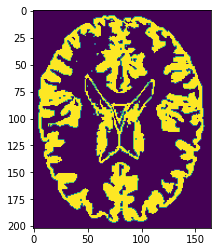

In [49]:
img = brain

seuil1 = 70
seuil2 = 150

gm = np.zeros_like(img)
m, n = img.shape

for i in range(m):
    for j in range(n):
        if seuil1 <= img[i,j] < seuil2:
            gm[i, j] = 1
            
plt.imshow(gm);

La fonction `zeros_like` crée und nouvelle matrice avec des zéros de la même taille que `img`.

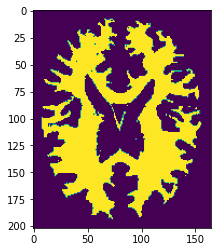

In [52]:
wm = np.zeros_like(img)

for i in range(m):
    for j in range(n):
        if seuil2 <= img[i,j]:
            wm[i, j] = 1
            
plt.imshow(wm);

## Combinaison des deux images

Les matrices `gm` et `wm` ne contiennent que des valeurs 0 et 1. 
Nous pouvons muliplier la matrice avec un nombre. 
Ensuite nous pouvons les additionner pour avoir l'image segmentée.

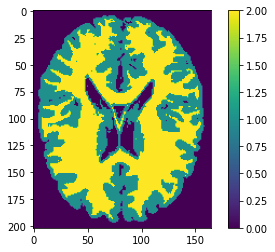

In [29]:
segmentation = 1 * gm + 2 * wm
plt.imshow(segmentation)
plt.colorbar();

Il est possible de pondérer de façon inverse.

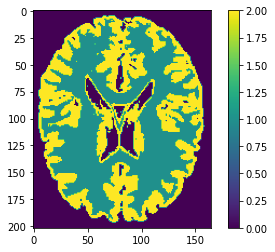

In [64]:
segmentation = 2 * gm + 1 * wm
plt.imshow(segmentation)
plt.colorbar();

## Juxtaposer deux images

La fonction `np.hstack` permet de juxtaposer deux matrices et d'en créer une plus grande.

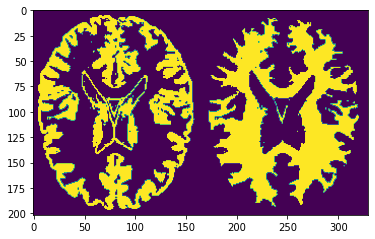

In [65]:
both = np.hstack([gm, wm])
plt.imshow(both);

La largeur est le double.

In [35]:
both.shape

(202, 330)

**Exercice**

- Affichez l'histogramme de `tumor`
- Cherchez les seuils appropriés
- Modifiez le code de classification pour extraire la matière blanche et grise
- Affichez-les

## Créer un masque

L'image `brain2` contient le crâne et les tissus cérébraux: pour faire la classification enlevons le crâne avec un masque.

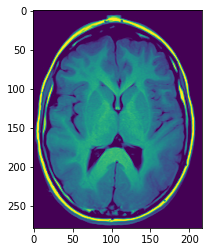

In [71]:
brain2 = imread('brain2.jpg')[:,:,0]
plt.imshow(brain2);

Pour créer un masque, nous commençons avec une matrice de zéro de la même dimension.

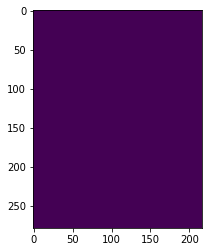

In [79]:
mask = np.zeros_like(brain2)
plt.imshow(mask);

Toutes les pixels sont zéro. Nous pouvons maintenant mettre certains pixels à 1. Par exemple nous pouvons mettre à 1 les pixels de la ligne 100 à 200.

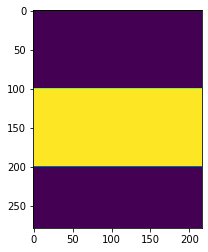

In [80]:
mask[100:200, :] = 1
plt.imshow(mask);

Multiplier ce mask avec une image va *masquer* tous les pixels qui sont 0 dans le masque, et afficher seuelemment les pixels qui sont à 1 dans le masque.

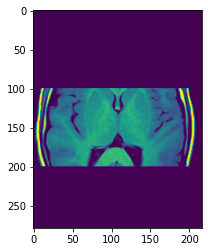

In [78]:
plt.imshow(brain2 * mask);

**Exercice**  
Créer un masque avec une barre verticale et appliquez la à l'image `brain2`.

## Appliquer un masque

Le fichier *mask.jpg* contient le masque à appliquer pour extraire seulement le cerveau sans le crâne pour l'image `brain2`.

A la base les pixels blancs ont la valeur 255. Pour obtenir des pixels avec la valeur 1, nous divisions la matrce par 255.

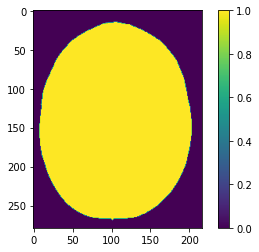

In [85]:
mask = imread('mask.bmp')[:,:,0]
mask = mask/255
plt.imshow(mask)
plt.colorbar();

Vérifions que l'image est binaire

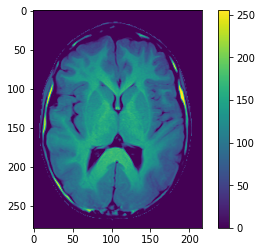

In [86]:
plt.imshow(brain2 * mask)
plt.colorbar();

**Exercice**  
Affichez les 3 images `brain2`,  `mask` et `brain2 * mask` avec la fonction `hstack` et `imshow`.
Si mask n'est pas visible, multipliez-le par 255.

Vérifions que `mask`contient seulement des 0 et 1 

## Analyser l'image masquée

Pour appliquer le masque et extraire le cerveau, nous créons une variable `brain_only` qui contient la multiplication des deux variables `mask` et `brain2`.

Affichons l'histogramme de cette image.

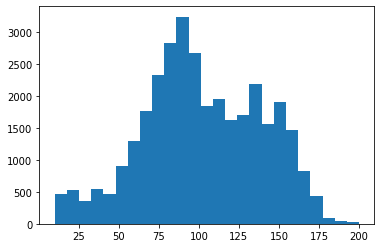

In [101]:
brain_only = brain2 * mask
plt.hist(brain_only.ravel(), bins=25, range=(10, 200));

**Exercice**  
Choissez des seuils approprié pour extraire les 2 tissus avec avec un code que vous écrivez. Puis affichez chacune des classes.

## Les ratios

Les ratios de chacun tissus par rapport au volume entier du cerveau sont des marqueurs permettent d'analyser les images IRM pour détécter certaines anomalies telles que la dégénérescence cérébrale.

Calculons le nombre de pixels de la matière grise.

In [102]:
np.count_nonzero(gm)

10043

Le nombre total des pixels du cerveau est:

In [104]:
np.count_nonzero(gm + wm)

21785

In [ ]:
Donc le ratio de la matière grise est

In [105]:
np.count_nonzero(gm) / np.count_nonzero(gm + wm)

0.46100527886160203

**Exercice**  
Calculez le ratio de matière blanche.